# Hotel Cancellation Model

## Business Problem Understanding

**Context**

dalam industri perhotelan, Booking adalah sistem pemesanan kamar hotel yang sudah berjalan lama. Booking merupakan sistem pemesanan dimana sebuah kamar hotel dipesan oleh kustomer dengan memesan atau juga dengan melakukan deposit di muka beberapa waktu sebelum kamar tersebut dipakai. Kustomer bisa memesan beberapa hari, minggu, bulan, bahkan beberapa tahun sebelumnya dimana pemesanan ini bisa **dikonfirmasi atau dibatalkan**. Pembatalan ini disebut sebagai **cancellation** dan akan menjadi target dalam permodelan project ini.

Target:

0: tidak dibatalkan

1: dibatalkan

**problem statement:**

Permasalahan yang sering terjadi dalam booking hotel adalah dimana booking dibatalkan sehingga pihak hotel kehilangan kustomer dan pendapatan. Hal ini menjadi masalah besar jika booking dilakukan tanpa deposit, hotel mempunyai aturan pengembalian deposit untuk pembatalan waktu tertentu, dan booking dalam waktu lama karena **penolakan kepada kustomer lain yang mempunyai potensi untuk memesan dan menempati kamar**. 

Hal ini menyebabkan **pendapatan hotel berkurang dan occupancy rate mereka tidak optimal**.

**Goals:**

maka berdasarkan permasalahan tersebut perusahaan perhotelan mempunyai keinginan untuk memprediksi apakah booking yang terjadi apakah ada kemungkinan besar akan dibatalkan atau tidak. Perusahaan perhotelan juga ingin mengetahui apa saja kriteria yang membuat booking kemungkinan besar akan dibatalkan sehingga pihak hotel bisa mengkonfirmasi kembali booking jika booking mempunyai kemungkinan akan batal.

**Analytic Approach:**

dengan data yang diberikan kita akan mencari pola dari model yang sudah dibuat dan membuat klasifikasi yang bertujuan untuk memprediksi kemungkinan apakah sebuah transaksi booking akan dibatalkan atau tidak.

**Metric Evaluation**

Type 1 error: False Positive
Konsekuensi: Kustomer akan komplain karena mereka diminta untuk konfirmasi kembali

Type 2 error: False Negative
Konsekuensi: potensi keuntungan akan hilang karena menyimpan booking yang akan dibatalkan

tujuan dari perusahaan perhotelan adalah untuk mengumpulkan sebanyak mungkin booking yang pasti akan masuk. Oleh karena itu tujuan dari project ini adalah untuk sebisa mungkin mendapatkan prediksi positif dan mengurangi sebanyak mungkin False negative. Jadi metric yang akan digunakan adalah Recall

## Data Understanding

**Konteks**

Dataset ini menyimpan informasi hotel yang berada di Portugal berhubungan dengan booking kustomer. Semua informasi personal sudah dihilangkan untuk kebutuhan privasi


**Features**

-	country: Asal Negara.
-	market_segment: Segmentasi Pasar. 
-	previous_cancellations: jumlah pembatalan booking yang sebelumnya pernah terjadi sebelum check in/cancellation.
-	booking_changes: jumlah perubahan booking dari kustomer sebelum terjadinya check in/cancellation.
-	deposit_type: Indikator apabila kustomer memasukkan deposit beserta tipenya. 
-	days_in_waiting_list: jumlah hari yang terjadi dari hari booking hingga hari check in/cancellation
-	customer_type: Tipe booking
-	reserved_room_type: Kode tipe kamar. Tipe kamar sudah diubah hingga tidak menunjukkan personal data.
-	required_car_parking_space: jumlah tempat parkir yang diperlukan untuk kustomer.
-	total_of_special_request: Jumlah permintaan yang diberikan kepada kustomer.
-	is_canceled: menunjukkan apabila kustomer checkin (0)/ cancell (1)


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('data_hotel_booking_demand.csv')

df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


Dalam pengecekan missing value, tidak terdapat adanya data yang hilang kecuali pada kolom country. Mari kita cek sebaran data yang hilang. Setiap data type sudah benar dan tidak perlu dirubah.

<Axes: >

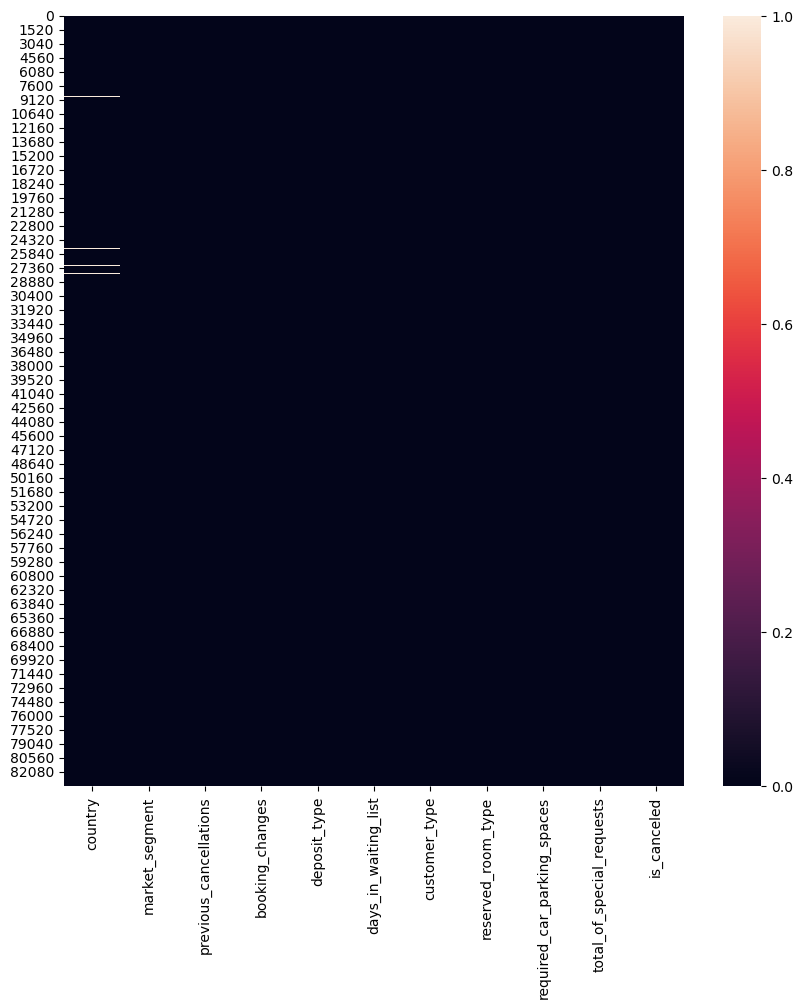

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['country','market_segment','previous_cancellations','booking_changes','deposit_type','days_in_waiting_list','customer_type','reserved_room_type','required_car_parking_spaces','total_of_special_requests','is_canceled']].isna())

Terlihat sebaran data yang hilang hanya terdapat di kolom country dan tidak terdapat pada kolom lain. Karena jumlahnya yang tidak signifikan, maka ada kemungkinan bahwa kolom ini akan di hapus.

In [65]:
pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


Bisa dilihat sebaran data dari tiap kolom. Data terdiri dari numerical dan kategorikal. satu kolom bernama required_car_parking_spaces akan dihapus karena dalam setiap booking, kustomer akan memperhitungkan jumlah parkir sebelum booking sehingga jumlah tempat parkir tidak akan berpengaruh terhadap cancellation.

In [66]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [67]:
df.describe(include='object')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


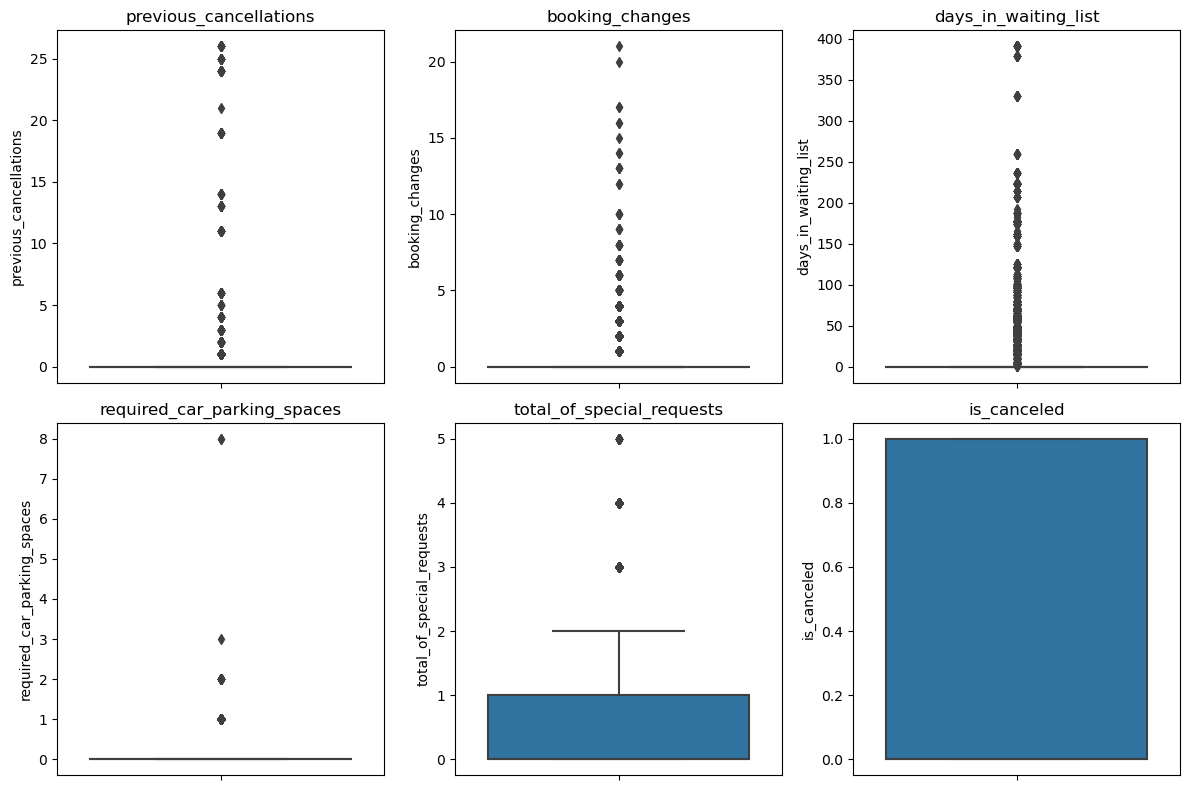

In [68]:
numerical_variables = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

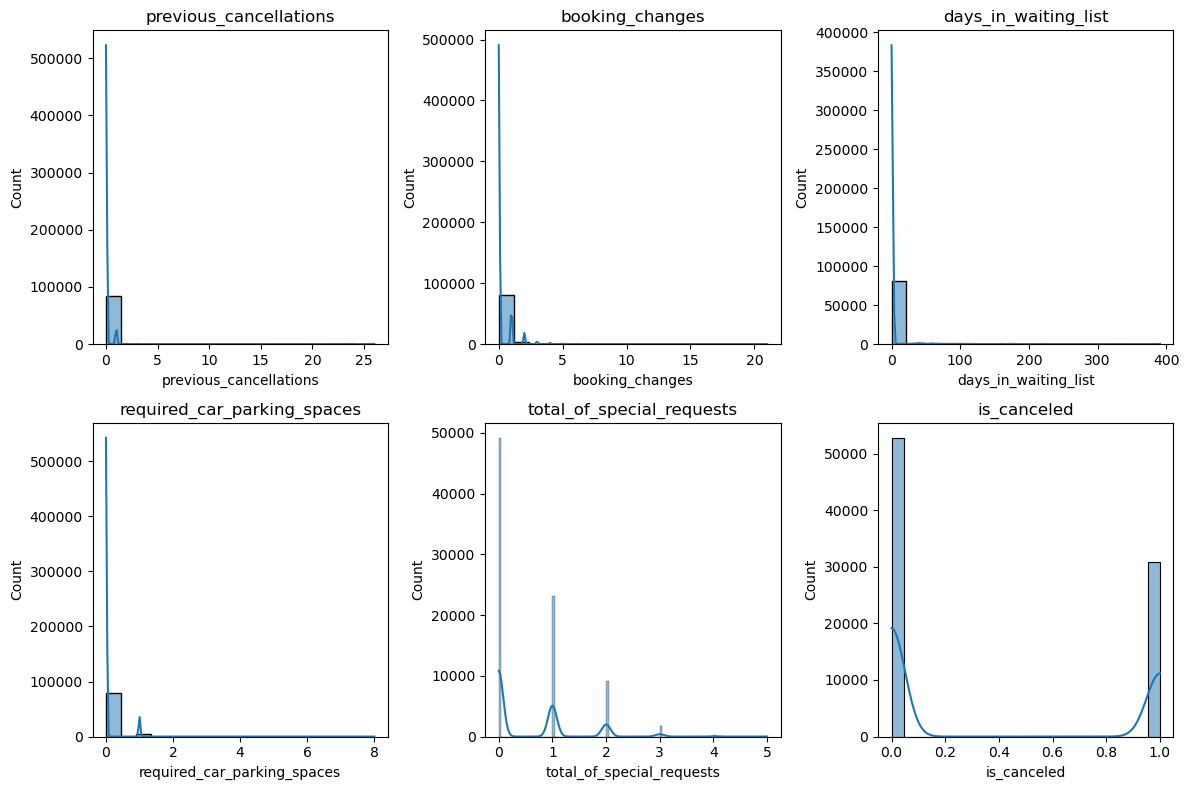

In [69]:

numerical_variables = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [70]:
numerical = df.loc[:, (df.dtypes != object)].columns.tolist()
numerical

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled']

In [71]:
categorical = df.loc[:, (df.dtypes == object)].columns.tolist()
categorical

['country',
 'market_segment',
 'deposit_type',
 'customer_type',
 'reserved_room_type']

In [72]:
zero_days_count = (df['days_in_waiting_list'] == 0).sum()

print("Number of data points with 0 days in waiting list:", zero_days_count)

Number of data points with 0 days in waiting list: 80988


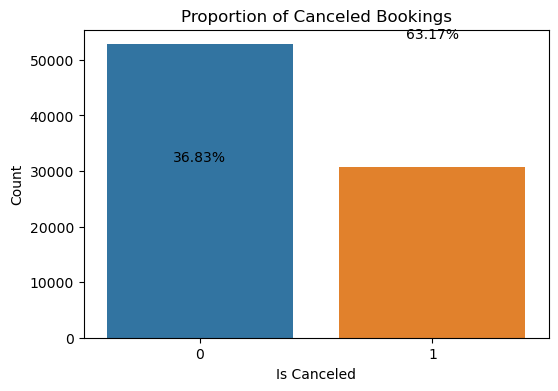

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_canceled')
plt.title('Proportion of Canceled Bookings')
plt.xlabel('Is Canceled')
plt.ylabel('Count')

total_count = len(df)
cancel_count = df['is_canceled'].sum()
not_cancel_count = total_count - cancel_count

cancel_proportion = cancel_count / total_count
not_cancel_proportion = not_cancel_count / total_count

plt.text(0, cancel_count + 1000, f'{cancel_proportion:.2%}', ha='center')
plt.text(1, not_cancel_count + 1000, f'{not_cancel_proportion:.2%}', ha='center')

plt.show()

## Data Cleaning



setelah disebutkan sebelumnya, salah satu kolom mempunyai kekosongan di dalamnya. Mari kita coba untuk membersihkan dataset ini dari data kosong.

In [74]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
814,NaN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1166,NaN,Direct,2,0,No Deposit,0,Transient,E,0,3,1
1304,NaN,Direct,0,1,No Deposit,0,Transient,D,0,1,0
1661,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
2182,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82466,NaN,Offline TA/TO,0,0,No Deposit,0,Transient,A,0,0,0
83084,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
83106,NaN,Direct,0,0,No Deposit,0,Transient,A,0,2,0
83353,NaN,Direct,0,0,No Deposit,0,Transient,A,0,0,0


In [75]:
df = df.dropna(axis=0)
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [76]:
display(df.info())
display(df.describe())
display(df.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
Index: 83222 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83222 non-null  object
 2   previous_cancellations       83222 non-null  int64 
 3   booking_changes              83222 non-null  int64 
 4   deposit_type                 83222 non-null  object
 5   days_in_waiting_list         83222 non-null  int64 
 6   customer_type                83222 non-null  object
 7   reserved_room_type           83222 non-null  object
 8   required_car_parking_spaces  83222 non-null  int64 
 9   total_of_special_requests    83222 non-null  int64 
 10  is_canceled                  83222 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.6+ MB


None

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83222.000000,83222.000000,83222.000000,83222.000000,83222.000000,83222.000000
mean,0.086864,0.220927,2.340391,0.062351,0.573610,0.369277
std,0.842588,0.648975,17.709632,0.245786,0.795082,0.482612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83222,83222,83222,83222
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39408,73012,62414,59761
